In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


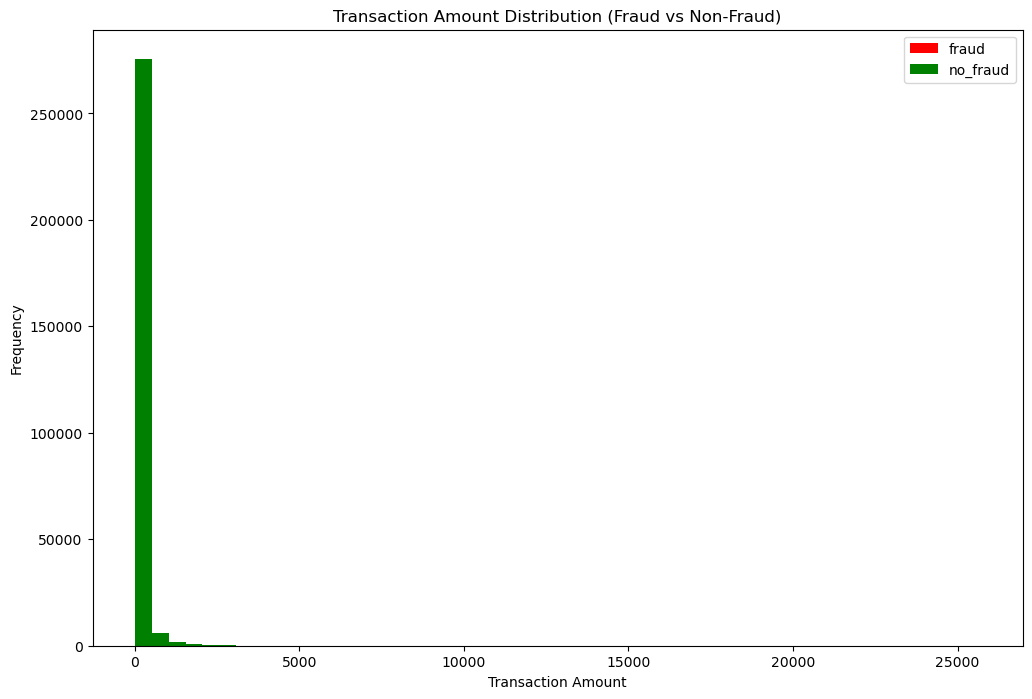

In [41]:
df_fraud=df[df['Class'] == 1]
df_no_fraud=df[df['Class'] ==0 ]

df_fraud_count=df_fraud.shape[0]
df_no_fraud_count=df_no_fraud.shape[0]

plt.figure(figsize=(12,8))
plt.hist(df_fraud['Amount'],bins=50,label='fraud',color='r')
plt.hist(df_no_fraud['Amount'], bins=50, label='no_fraud', color='g')

plt.legend()
plt.title('Transaction Amount Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()



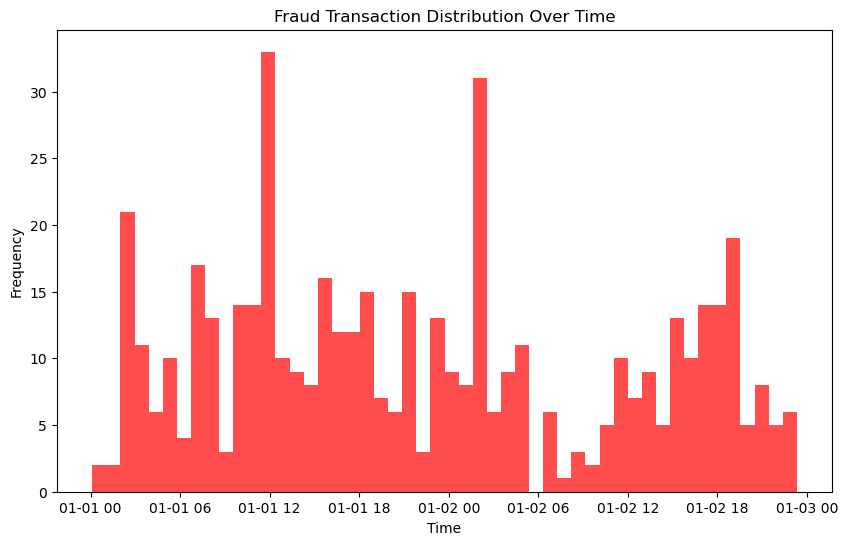

In [53]:
df_fraud.loc[:, 'Time'] = pd.to_datetime(df_fraud['Time'], unit='m') 

plt.figure(figsize=(10, 6))
plt.hist(df_fraud['Time'],bins=50, alpha=0.7,color='r')
plt.title('Fraud Transaction Distribution Over Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

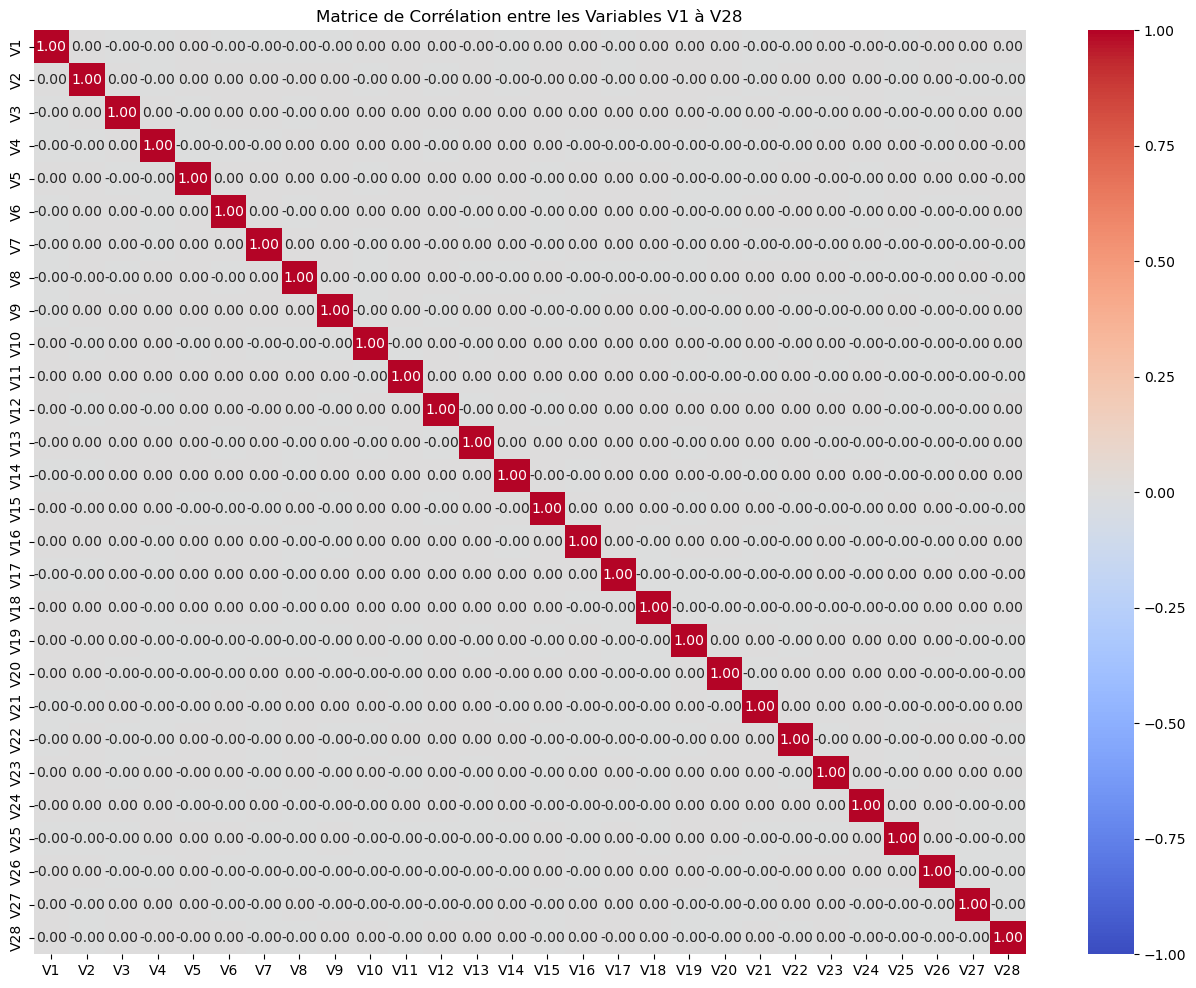

In [21]:
correlation_matrix = df.iloc[:, 1:-2].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation entre les Variables V1 à V28")
plt.show()

In [23]:
correlation_with_class = df.iloc[:, 1:-2].corrwith(df['Class'])  # Corrélation avec la colonne 'Class'
print("Corrélation des variables avec la classe (Fraude vs Non Fraude) :")
print(correlation_with_class)

Corrélation des variables avec la classe (Fraude vs Non Fraude) :
V1    -0.101347
V2     0.091289
V3    -0.192961
V4     0.133447
V5    -0.094974
V6    -0.043643
V7    -0.187257
V8     0.019875
V9    -0.097733
V10   -0.216883
V11    0.154876
V12   -0.260593
V13   -0.004570
V14   -0.302544
V15   -0.004223
V16   -0.196539
V17   -0.326481
V18   -0.111485
V19    0.034783
V20    0.020090
V21    0.040413
V22    0.000805
V23   -0.002685
V24   -0.007221
V25    0.003308
V26    0.004455
V27    0.017580
V28    0.009536
dtype: float64


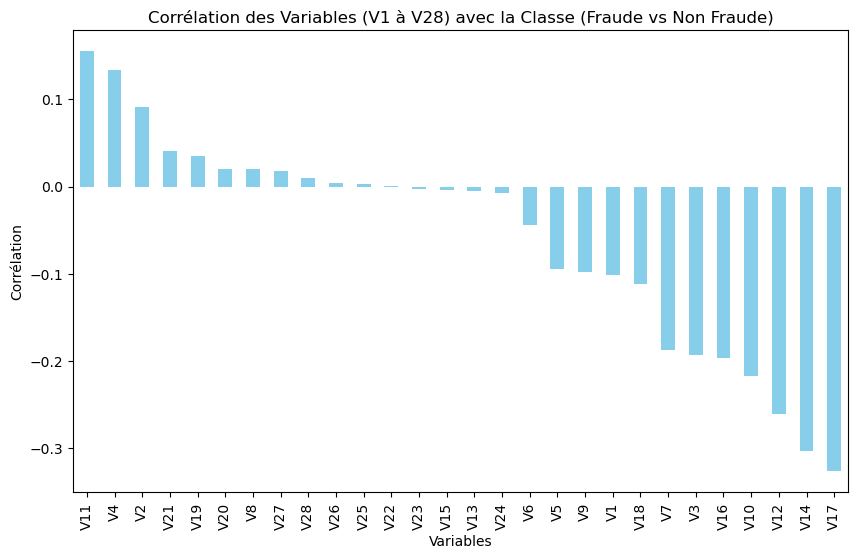

In [25]:
plt.figure(figsize=(10, 6))
correlation_with_class.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Corrélation des Variables (V1 à V28) avec la Classe (Fraude vs Non Fraude)")
plt.ylabel("Corrélation")
plt.xlabel("Variables")
plt.show()

In [49]:
fraud_sample = df_fraud[['Time', 'Amount', 'Class']].head(10)
print("Sample Fraud Transactions:")
print(fraud_sample)

Sample Fraud Transactions:
                    Time  Amount  Class
541  1970-01-01 00:06:46    0.00      1
623  1970-01-01 00:07:52  529.00      1
4920 1970-01-01 01:14:22  239.93      1
6108 1970-01-01 01:56:26   59.00      1
6329 1970-01-01 02:05:19    1.00      1
6331 1970-01-01 02:05:26    1.00      1
6334 1970-01-01 02:05:35    1.00      1
6336 1970-01-01 02:05:43    1.00      1
6338 1970-01-01 02:05:51    1.00      1
6427 1970-01-01 02:06:50    1.00      1


In [61]:
fraud_amount=df_fraud['Amount'].values
no_fraud_amount=df_no_fraud['Amount'].values

fraud_mean=np.mean(fraud_amount)
fraud_median=np.median(fraud_amount)
fraud_std=np.std(fraud_amount)

no_fraud_mean=np.mean(no_fraud_amount)
no_fraud_median=np.median(no_fraud_amount)
no_fraud_std=np.std(no_fraud_amount)
print("stats des montants de fraudes")
print(f"  Moyenne : {fraud_mean:.2f}, Médiane : {fraud_median:.2f}, Écart-type : {fraud_std:.2f}")
print("stats des montants de non_fraudes")
print(f"  Moyenne : {no_fraud_mean:.2f}, Médiane : {no_fraud_median:.2f}, Écart-type : {no_fraud_std:.2f}")


stats des montants de fraudes
  Moyenne : 122.21, Médiane : 9.25, Écart-type : 256.42
stats des montants de non_fraudes
  Moyenne : 88.29, Médiane : 22.00, Écart-type : 250.10


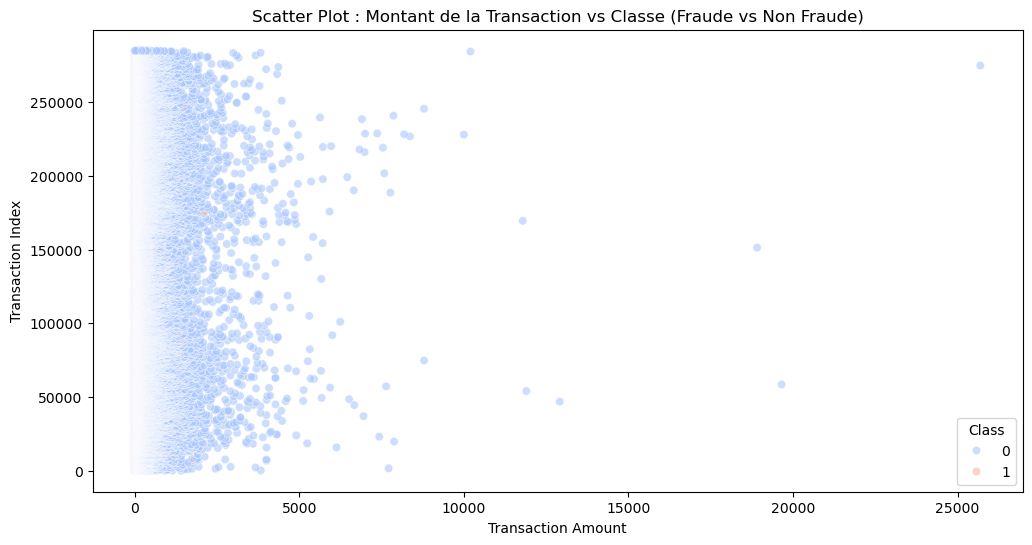

In [67]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Amount', y=df.index, hue='Class', data=df, palette='coolwarm', alpha=0.6)
plt.title('Scatter Plot : Montant de la Transaction vs Classe (Fraude vs Non Fraude)')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Index')
plt.show()

2025-01-04 22:33:23.984 
  command:

    streamlit run C:\Users\Niel\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-04 22:33:23.984 Session state does not function when running a script without `streamlit run`
C:\Users\Niel\AppData\Local\Temp\ipykernel_10412\4000213419.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df_filtered, palette="Set2", showfliers=True)


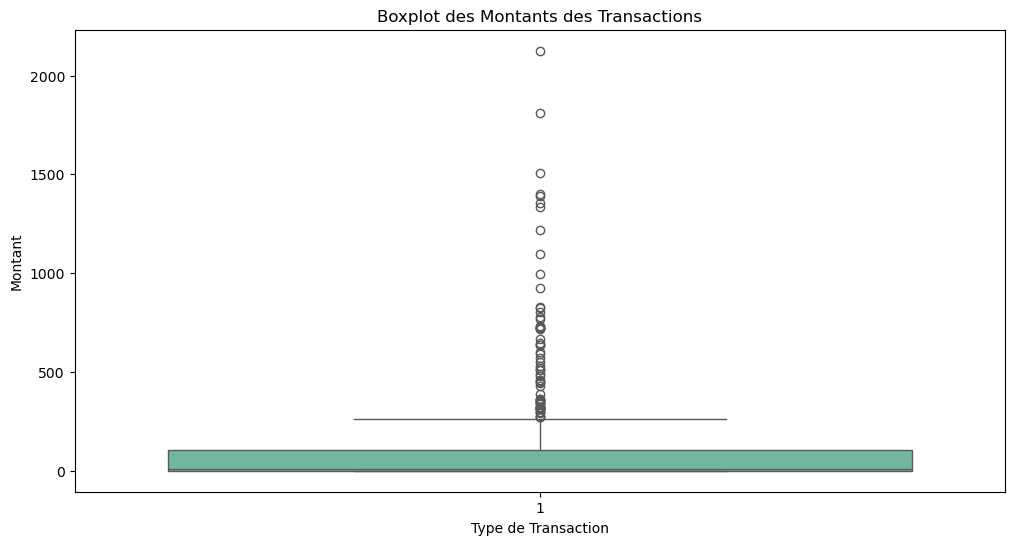

In [69]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
df = pd.read_csv("creditcard.csv")

# Créer l'interface utilisateur
st.title("Analyse des Transactions Bancaires")

# Sélectionner le type de transaction
transaction_type = st.selectbox("Sélectionner le type de transaction", ["Frauduleuse", "Non-Frauduleuse"])

# Filtrer les données en fonction du type de transaction
if transaction_type == "Frauduleuse":
    df_filtered = df[df['Class'] == 1]
else:
    df_filtered = df[df['Class'] == 0]

# Afficher les boxplots
st.subheader("Boxplot des Montants des Transactions")
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df_filtered, palette="Set2", showfliers=True)
ax.set_title("Boxplot des Montants des Transactions")
ax.set_xlabel("Type de Transaction")
ax.set_ylabel("Montant")
st.pyplot(fig)

# Calculer et afficher les statistiques
mean_amount = np.mean(df_filtered['Amount'])
median_amount = np.median(df_filtered['Amount'])
std_amount = np.std(df_filtered['Amount'])

st.subheader("Statistiques des Montants des Transactions")
st.write(f"Moyenne des Montants : {mean_amount:.2f}")
st.write(f"Médiane des Montants : {median_amount:.2f}")
st.write(f"Écart-Type des Montants : {std_amount:.2f}")
